In [ ]:
!pip install iterative-stratification

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, KFold, StratifiedKFold, GridSearchCV, ParameterGrid, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay, roc_curve, roc_auc_score, f1_score, make_scorer
from sklearn import tree, ensemble, neighbors
from sklearn.neighbors import KNeighborsClassifier, RadiusNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, ExtraTreesClassifier, AdaBoostClassifier
from sklearn.svm import SVC
import xgboost as xgb
import lightgbm as lgb
from iterstrat.ml_stratifiers import MultilabelStratifiedKFold
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.multioutput import MultiOutputClassifier
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
from sklearn.model_selection import StratifiedKFold

/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


Rutas Emanuel:


In [ ]:
x_variables = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/AMP/X_selected')
y_variables = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/AMP/df_final.csv')
more_x_variables = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/AMP/df_x_200.csv')


y_variables = y_variables.iloc[:,2:]

Rutas Santiago:

In [ ]:
x_variables = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Laboratorio Integrado I/Variables predictoras/X_new_selected')
y_variables = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Laboratorio Integrado I/Variables objetivo/df_final.csv')
more_x_variables = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Laboratorio Integrado I/Variables predictoras/df_x_200.csv')

y_variables = y_variables.iloc[:,2:]

In [ ]:
#División inicial en 80% para entrenamiento y 20% para validación final
X_train_temp, X_val, y_train_temp, y_val = train_test_split(more_x_variables, y_variables, test_size=0.20, random_state=42)

#Fase1
y_antimicrobiano = y_train_temp['Antimicrobiano']

#Fase2
y_antiMCT = y_train_temp[['Anticancerigeno', 'Antitumoral']]

#Fase3
y_functionalities = y_train_temp[['Antifúngico', 'Antiviral', 'Antibacteriano', 'Anti Gram +', 'Anti Gram -', 'AntiVIH', 'Antiparasitario']]

In [ ]:
#Conjuntos de validación

y_val_phase1 = y_val['Antimicrobiano']
y_val_phase2 = y_val[['Anticancerigeno', 'Antitumoral']]
y_val_phase3 = y_val[['Antifúngico', 'Antiviral', 'Antibacteriano', 'Anti Gram +', 'Anti Gram -', 'AntiVIH', 'Antiparasitario']]

## Fase 1


In [ ]:
models = {
    'Random Forest': RandomForestClassifier(),
    'Logistic': LogisticRegression(max)
}

for random_state in [42]:
    print(f'\nRandom State: {random_state}')

    X_train, X_test, y_train, y_test = train_test_split(X_train_temp, y_antimicrobiano, test_size=0.3, random_state=random_state)

    for model_name, model in models.items():
        model.set_params(random_state=random_state)  # Establecer random_state si aplica
        model.fit(X_train, y_train)
        predictions = model.predict(X_test)
        f1 = f1_score(y_test, predictions)
        print(f'{model_name} - F1 Score: {f1:.2f}')
        report = classification_report(y_test, predictions, target_names=['Clase 0', 'Clase 1'])
        print(report)
        predictions_val = model.predict(X_val)
        f1_val = f1_score(y_val_phase1, predictions_val)
        print("F1 en conjunto de validación", classification_report(y_val_phase1, predictions_val, target_names=['Clase 0', 'Clase 1']))


Random State: 42
Random Forest - F1 Score: 0.93
              precision    recall  f1-score   support

     Clase 0       0.90      0.92      0.91      4386
     Clase 1       0.93      0.92      0.93      5416

    accuracy                           0.92      9802
   macro avg       0.92      0.92      0.92      9802
weighted avg       0.92      0.92      0.92      9802

F1 en conjunto de validación               precision    recall  f1-score   support

     Clase 0       0.90      0.92      0.91      3659
     Clase 1       0.93      0.92      0.93      4509

    accuracy                           0.92      8168
   macro avg       0.92      0.92      0.92      8168
weighted avg       0.92      0.92      0.92      8168

Logistic - F1 Score: 0.89
              precision    recall  f1-score   support

     Clase 0       0.85      0.87      0.86      4386
     Clase 1       0.89      0.88      0.89      5416

    accuracy                           0.87      9802
   macro avg       0.87 

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


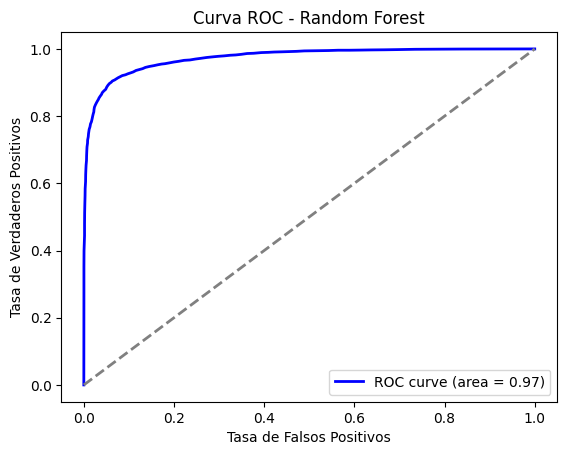

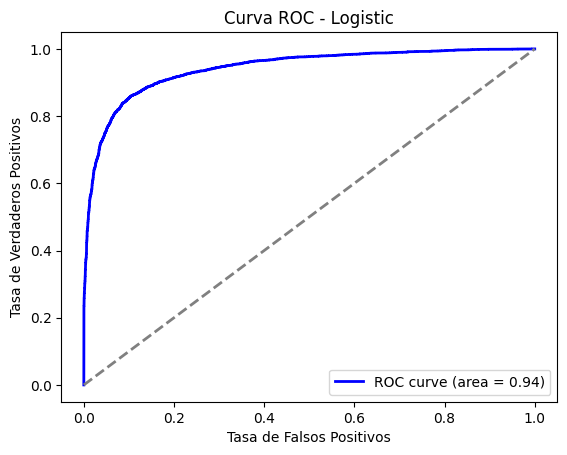

In [ ]:
from sklearn.metrics import roc_curve, auc

for model_name, model in models.items():
    y_prob = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)

    plt.figure()
    plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
    plt.title(f'Curva ROC - {model_name}')
    plt.xlabel('Tasa de Falsos Positivos')
    plt.ylabel('Tasa de Verdaderos Positivos')
    plt.legend(loc='lower right')
    plt.show()

In [ ]:
models = {
    'Random Forest': RandomForestClassifier(),
    'Logistic': LogisticRegression()
}

# Parámetros generales
n_splits = 5
random_state = 42
stratified_kf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=random_state)

# Realiza StratifiedKFold
for random_state in [42]:
    print(f'\nRandom State: {random_state}')

    for model_name, model in models.items():
        print(f'\nModelo: {model_name}')
        fold_scores = []

        for fold, (train_idx, test_idx) in enumerate(stratified_kf.split(X_train_temp, y_antimicrobiano)):
            print(f'\nFold {fold + 1}/{n_splits}')

            # Usa .iloc para seleccionar filas por posición
            X_train, X_test = X_train_temp.iloc[train_idx], X_train_temp.iloc[test_idx]
            y_train, y_test = y_antimicrobiano.iloc[train_idx], y_antimicrobiano.iloc[test_idx]

            # Configura el random_state si aplica
            if hasattr(model, 'random_state'):
                model.set_params(random_state=random_state)

            # Entrena el modelo
            model.fit(X_train, y_train)
            predictions = model.predict(X_test)

            # Métricas
            f1 = f1_score(y_test, predictions)
            fold_scores.append(f1)
            print(f'F1 Score (Fold {fold + 1}): {f1:.2f}')

            # Reporte por fold
            report = classification_report(y_test, predictions, target_names=['Clase 0', 'Clase 1'])
            print(report)

        # Promedio de F1 Score
        mean_f1 = sum(fold_scores) / len(fold_scores)
        print(f'\n{model_name} - Promedio F1 Score: {mean_f1:.2f}')



Random State: 42

Modelo: Random Forest

Fold 1/5
F1 Score (Fold 1): 0.92
              precision    recall  f1-score   support

     Clase 0       0.89      0.93      0.91      2914
     Clase 1       0.94      0.91      0.92      3621

    accuracy                           0.92      6535
   macro avg       0.92      0.92      0.92      6535
weighted avg       0.92      0.92      0.92      6535


Fold 2/5
F1 Score (Fold 2): 0.92
              precision    recall  f1-score   support

     Clase 0       0.89      0.91      0.90      2915
     Clase 1       0.93      0.91      0.92      3620

    accuracy                           0.91      6535
   macro avg       0.91      0.91      0.91      6535
weighted avg       0.91      0.91      0.91      6535


Fold 3/5
F1 Score (Fold 3): 0.93
              precision    recall  f1-score   support

     Clase 0       0.90      0.93      0.92      2914
     Clase 1       0.94      0.92      0.93      3620

    accuracy                           

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


F1 Score (Fold 1): 0.88
              precision    recall  f1-score   support

     Clase 0       0.85      0.87      0.86      2914
     Clase 1       0.89      0.87      0.88      3621

    accuracy                           0.87      6535
   macro avg       0.87      0.87      0.87      6535
weighted avg       0.87      0.87      0.87      6535


Fold 2/5


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


F1 Score (Fold 2): 0.88
              precision    recall  f1-score   support

     Clase 0       0.85      0.86      0.85      2915
     Clase 1       0.89      0.87      0.88      3620

    accuracy                           0.87      6535
   macro avg       0.87      0.87      0.87      6535
weighted avg       0.87      0.87      0.87      6535


Fold 3/5


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


F1 Score (Fold 3): 0.89
              precision    recall  f1-score   support

     Clase 0       0.85      0.88      0.86      2914
     Clase 1       0.90      0.87      0.89      3620

    accuracy                           0.88      6534
   macro avg       0.87      0.88      0.87      6534
weighted avg       0.88      0.88      0.88      6534


Fold 4/5


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


F1 Score (Fold 4): 0.88
              precision    recall  f1-score   support

     Clase 0       0.85      0.87      0.86      2914
     Clase 1       0.89      0.88      0.88      3620

    accuracy                           0.87      6534
   macro avg       0.87      0.87      0.87      6534
weighted avg       0.87      0.87      0.87      6534


Fold 5/5
F1 Score (Fold 5): 0.89
              precision    recall  f1-score   support

     Clase 0       0.86      0.87      0.86      2914
     Clase 1       0.89      0.88      0.89      3620

    accuracy                           0.88      6534
   macro avg       0.87      0.87      0.87      6534
weighted avg       0.88      0.88      0.88      6534


Logistic - Promedio F1 Score: 0.88


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### Random forest grid search

In [ ]:
rf = RandomForestClassifier(random_state=42)

# Definir los parámetros a buscar
param_grid = {
    'n_estimators': [300],
    'criterion': ['gini', 'entropy'],
    'max_features': ['sqrt', 'log2']
}

# Configurar KFold
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Realizar Grid Search con validación cruzada
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=kf, scoring='f1', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Obtener los mejores parámetros
print("Mejores parámetros encontrados:", grid_search.best_params_)

# Predecir con el mejor modelo
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Generar el classification report
report = classification_report(y_test, y_pred, target_names=['Clase 0', 'Clase 1'])
print(report)

Mejores parámetros encontrados: {'criterion': 'gini', 'max_features': 'sqrt', 'n_estimators': 300}
              precision    recall  f1-score   support

     Clase 0       0.90      0.92      0.91      4386
     Clase 1       0.93      0.92      0.93      5416

    accuracy                           0.92      9802
   macro avg       0.92      0.92      0.92      9802
weighted avg       0.92      0.92      0.92      9802



In [ ]:
model = RandomForestClassifier(random_state=42)

# Definir los parámetros a evaluar
param_grid = {
    'n_estimators': [300],
    'max_features': ['sqrt', 'log2'],
    'criterion': ['gini', 'entropy']
}

kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Crear una función para ajustar el modelo y devolver el resultado
def evaluate_model(params):
    model.set_params(**params)
    scores = cross_val_score(model, X_train, y_train, cv=kf, scoring='f1_weighted')
    return {'params': params, 'mean_test_score': np.mean(scores)}

# Ejecutar el ajuste con monitoreo
results = []
for i, params in enumerate(ParameterGrid(param_grid)):
    print(f"Evaluando combinación {i + 1}/{len(ParameterGrid(param_grid))}: {params}")
    result = evaluate_model(params)
    results.append(result)

# Convertir a DataFrame para una visualización más clara
results_df = pd.DataFrame(results)

# Mejor resultado
best_result = results_df.loc[results_df['mean_test_score'].idxmax()]
print("\nMejores parámetros:", best_result['params'])
print("Mejor F1 Score:", best_result['mean_test_score'])

Evaluando combinación 1/20: {'criterion': 'gini', 'max_features': 'sqrt', 'n_estimators': 50}
Evaluando combinación 2/20: {'criterion': 'gini', 'max_features': 'sqrt', 'n_estimators': 100}
Evaluando combinación 3/20: {'criterion': 'gini', 'max_features': 'sqrt', 'n_estimators': 150}
Evaluando combinación 4/20: {'criterion': 'gini', 'max_features': 'sqrt', 'n_estimators': 200}
Evaluando combinación 5/20: {'criterion': 'gini', 'max_features': 'sqrt', 'n_estimators': 300}
Evaluando combinación 6/20: {'criterion': 'gini', 'max_features': 'log2', 'n_estimators': 50}
Evaluando combinación 7/20: {'criterion': 'gini', 'max_features': 'log2', 'n_estimators': 100}
Evaluando combinación 8/20: {'criterion': 'gini', 'max_features': 'log2', 'n_estimators': 150}
Evaluando combinación 9/20: {'criterion': 'gini', 'max_features': 'log2', 'n_estimators': 200}
Evaluando combinación 10/20: {'criterion': 'gini', 'max_features': 'log2', 'n_estimators': 300}
Evaluando combinación 11/20: {'criterion': 'entropy

##Fase 2


In [ ]:
print(y_antiMCT[(y_antiMCT['Antimicrobiano'] == 1) &
                        (y_antiMCT['Anticancerigeno'] == 1) &
                        (y_antiMCT['Antitumoral'] == 1)])

       Antimicrobiano  Anticancerigeno  Antitumoral
60                1.0              1.0          1.0
94                1.0              1.0          1.0
105               1.0              1.0          1.0
108               1.0              1.0          1.0
114               1.0              1.0          1.0
...               ...              ...          ...
18356             1.0              1.0          1.0
18436             1.0              1.0          1.0
18451             1.0              1.0          1.0
18468             1.0              1.0          1.0
18499             1.0              1.0          1.0

[273 rows x 3 columns]


In [ ]:
print(y_antiMCT[(y_antiMCT['Antimicrobiano'] == 1) &
                        (y_antiMCT['Anticancerigeno'] == 1) &
                        (y_antiMCT['Antitumoral'] == 0)])

       Antimicrobiano  Anticancerigeno  Antitumoral
87                1.0              1.0          0.0
101               1.0              1.0          0.0
110               1.0              1.0          0.0
119               1.0              1.0          0.0
148               1.0              1.0          0.0
...               ...              ...          ...
18461             1.0              1.0          0.0
18508             1.0              1.0          0.0
18512             1.0              1.0          0.0
18515             1.0              1.0          0.0
18527             1.0              1.0          0.0

[707 rows x 3 columns]


In [ ]:
print(y_antiMCT[(y_antiMCT['Antimicrobiano'] == 1) &
                        (y_antiMCT['Anticancerigeno'] == 0) &
                        (y_antiMCT['Antitumoral'] == 1)])

       Antimicrobiano  Anticancerigeno  Antitumoral
1577              1.0              0.0          1.0
15132             1.0              0.0          1.0
16842             1.0              0.0          1.0
17496             1.0              0.0          1.0


In [ ]:
contador = 0
limite = 707

# Condiciones para identificar filas que cumplen la condición
condition = ((y_antiMCT['Antimicrobiano'] == 1) & (y_antiMCT['Anticancerigeno'] == 1) & (y_antiMCT['Antitumoral'] == 0))

# Iterar sobre las primeras `limite` filas que cumplen la condición
for idx in y_antiMCT[condition].index:
    if contador >= limite:
        break
    y_antiMCT.loc[idx, 'Antimicrobiano'] = 0
    contador += 1

print("Se han modificado las primeras", contador, "filas que cumplen la condición.")

Se han modificado las primeras 707 filas que cumplen la condición.


In [ ]:
contador = 0
limite = 273

# Condiciones para identificar filas que cumplen la condición
condition = ((y_antiMCT['Antimicrobiano'] == 1) & (y_antiMCT['Anticancerigeno'] == 1) & (y_antiMCT['Antitumoral'] == 1))

# Iterar sobre las primeras `limite` filas que cumplen la condición
for idx in y_antiMCT[condition].index:
    if contador >= limite:
        break
    y_antiMCT.loc[idx, ['Antimicrobiano', 'Anticancerigeno']] = 0
    contador += 1

print("Se han modificado las primeras", contador, "filas que cumplen la condición.")

Se han modificado las primeras 273 filas que cumplen la condición.


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_train_temp, y_antiMCT, test_size=0.2, random_state=42)

In [ ]:
models = {
    'LightGBM': MultiOutputClassifier(lgb.LGBMClassifier(n_estimators=1000, learning_rate=0.1), n_jobs=-1),
    'XGB': xgb.XGBClassifier(n_estimators = 500, learning_rate=0.1, learuse_label_encoder=False, eval_metric='mlogloss'),
    'Extratrees': ExtraTreesClassifier(min_samples_leaf=1, min_samples_split=2, n_estimators=300, random_state=42, criterion="entropy")
}

# Aplicar diferentes random_states
for random_state in [42]:
    print(f'\nRandom State: {random_state}')

    X_train, X_test, y_train, y_test = train_test_split(X_train_temp, y_antiMCT, test_size=0.2, random_state=42)

    for model_name, model in models.items():
        if hasattr(model, 'random_state'):  # Verificar si el modelo tiene el parámetro random_state
          model.set_params(random_state=42)  # Establecer random_state
        model.fit(X_train, y_train)
        predictions = model.predict(X_test)
        f1 = f1_score(y_test, predictions, average='micro')
        print(f'{model_name} - F1 Score: {f1:.2f}')
        report = classification_report(y_test, predictions, target_names=['Anticancerigeno', 'Antitumoral'])  # Añade los nombres de tus clases
        print(report)
        predictions_val = model.predict(X_val)
        f1_val = f1_score(y_val_phase2, predictions_val, average='micro')
        print("F1 en conjunto de validación:", classification_report(y_val_phase2, predictions_val, target_names=['Anticancerigeno', 'Antitumoral']))



Random State: 42
LightGBM - F1 Score: 0.51
                 precision    recall  f1-score   support

Anticancerigeno       0.78      0.38      0.51       271
    Antitumoral       0.85      0.38      0.52        88

      micro avg       0.80      0.38      0.51       359
      macro avg       0.81      0.38      0.52       359
   weighted avg       0.80      0.38      0.51       359
    samples avg       0.02      0.02      0.02       359



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in samples with no true nor predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/me

F1 en conjunto de validación:                  precision    recall  f1-score   support

Anticancerigeno       0.82      0.35      0.49       348
    Antitumoral       0.77      0.35      0.48       117

      micro avg       0.81      0.35      0.49       465
      macro avg       0.80      0.35      0.49       465
   weighted avg       0.81      0.35      0.49       465
    samples avg       0.02      0.01      0.01       465



/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [17:57:01] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "learuse_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGB - F1 Score: 0.51
                 precision    recall  f1-score   support

Anticancerigeno       0.82      0.37      0.51       271
    Antitumoral       0.86      0.35      0.50        88

      micro avg       0.83      0.36      0.51       359
      macro avg       0.84      0.36      0.50       359
   weighted avg       0.83      0.36      0.51       359
    samples avg       0.02      0.01      0.02       359



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in samples with no true nor predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/me

F1 en conjunto de validación:                  precision    recall  f1-score   support

Anticancerigeno       0.86      0.33      0.48       348
    Antitumoral       0.75      0.31      0.44       117

      micro avg       0.83      0.32      0.47       465
      macro avg       0.80      0.32      0.46       465
   weighted avg       0.83      0.32      0.47       465
    samples avg       0.01      0.01      0.01       465

Extratrees - F1 Score: 0.45
                 precision    recall  f1-score   support

Anticancerigeno       0.77      0.32      0.45       271
    Antitumoral       0.81      0.30      0.43        88

      micro avg       0.78      0.31      0.45       359
      macro avg       0.79      0.31      0.44       359
   weighted avg       0.78      0.31      0.45       359
    samples avg       0.01      0.01      0.01       359



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in samples with no true nor predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


F1 en conjunto de validación:                  precision    recall  f1-score   support

Anticancerigeno       0.78      0.30      0.44       348
    Antitumoral       0.71      0.30      0.42       117

      micro avg       0.77      0.30      0.43       465
      macro avg       0.75      0.30      0.43       465
   weighted avg       0.77      0.30      0.43       465
    samples avg       0.01      0.01      0.01       465



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in samples with no true nor predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


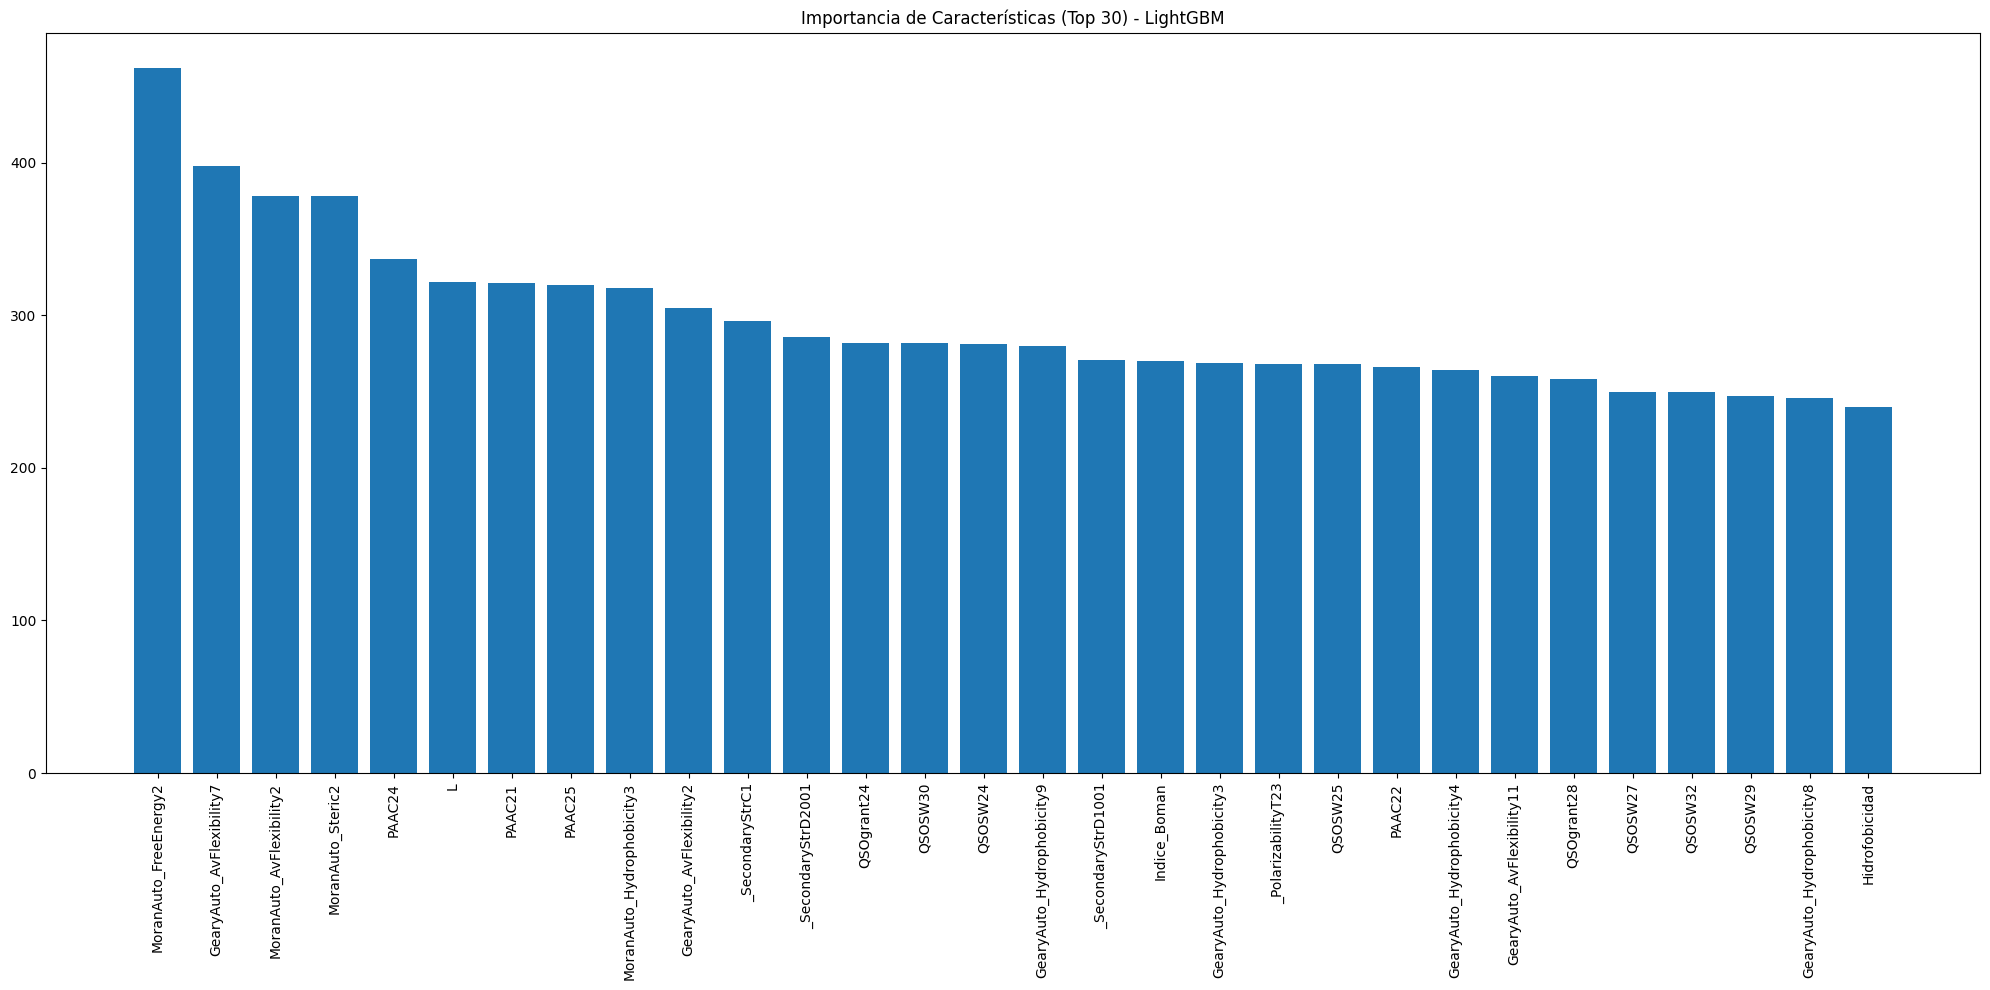

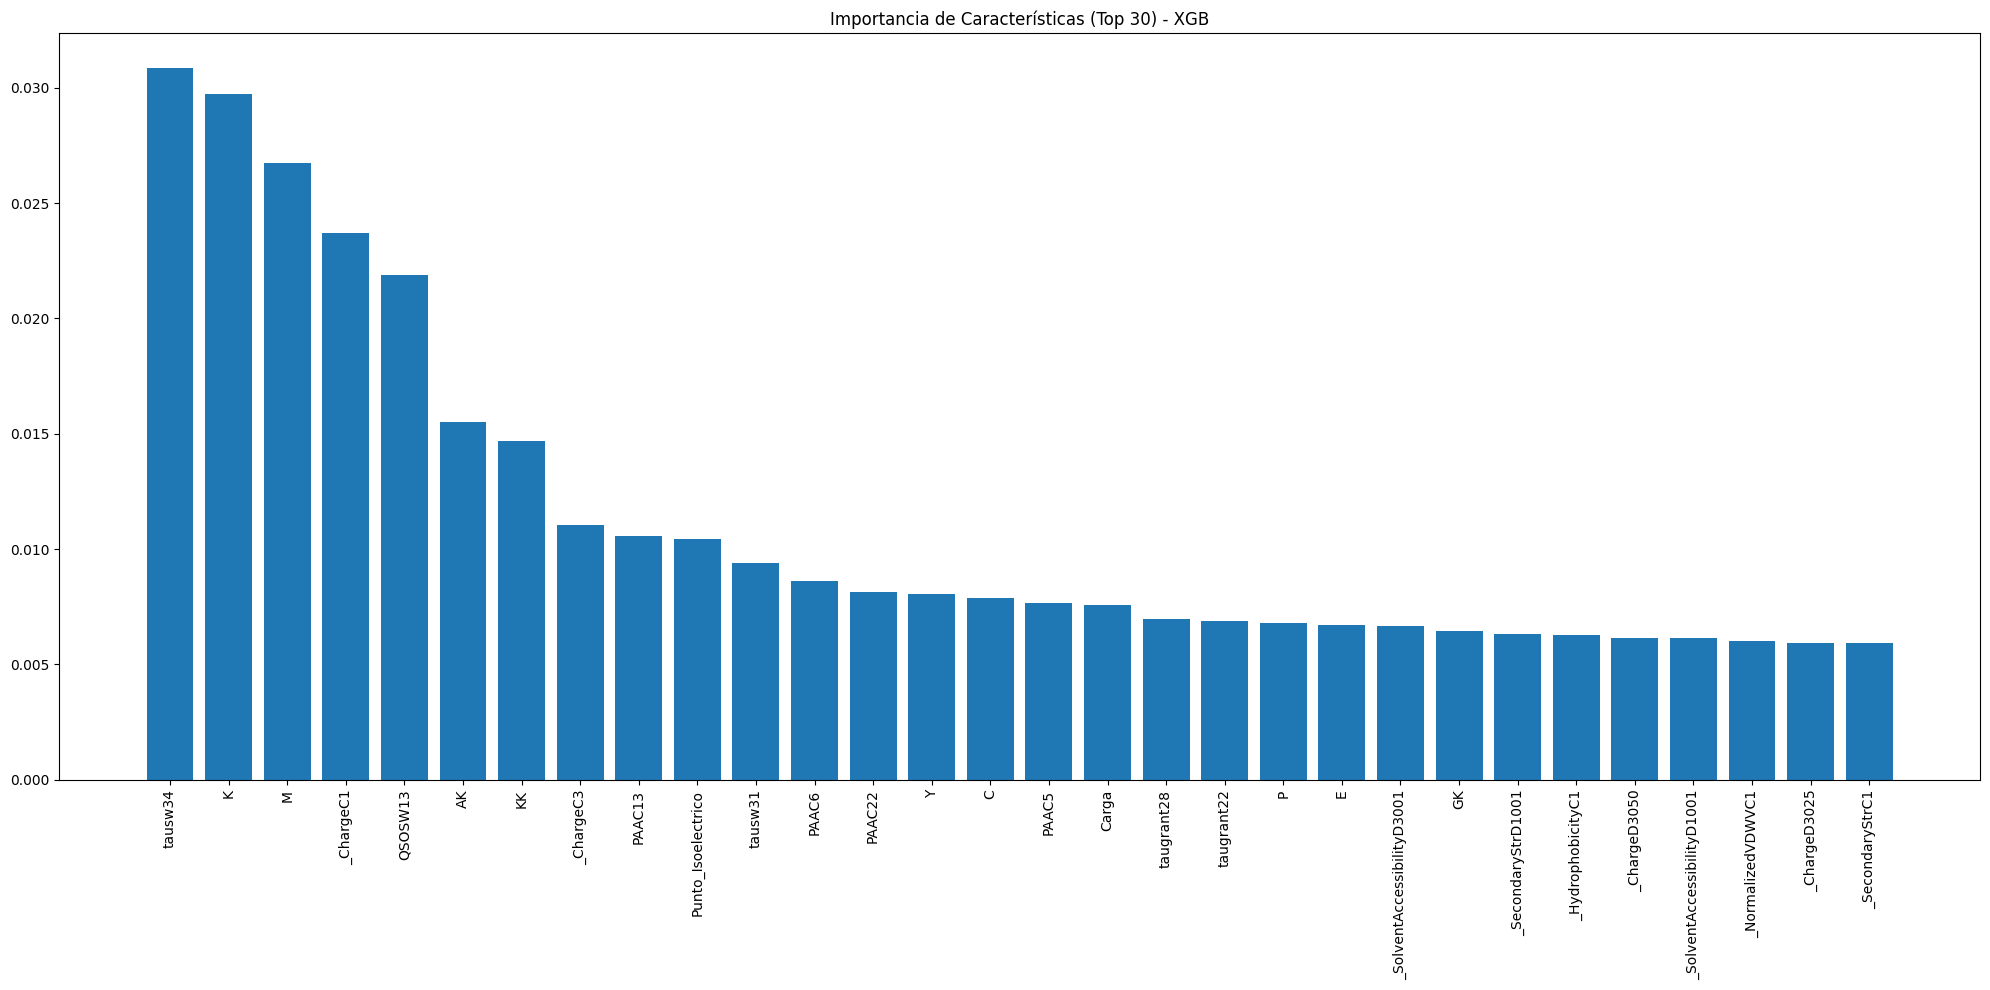

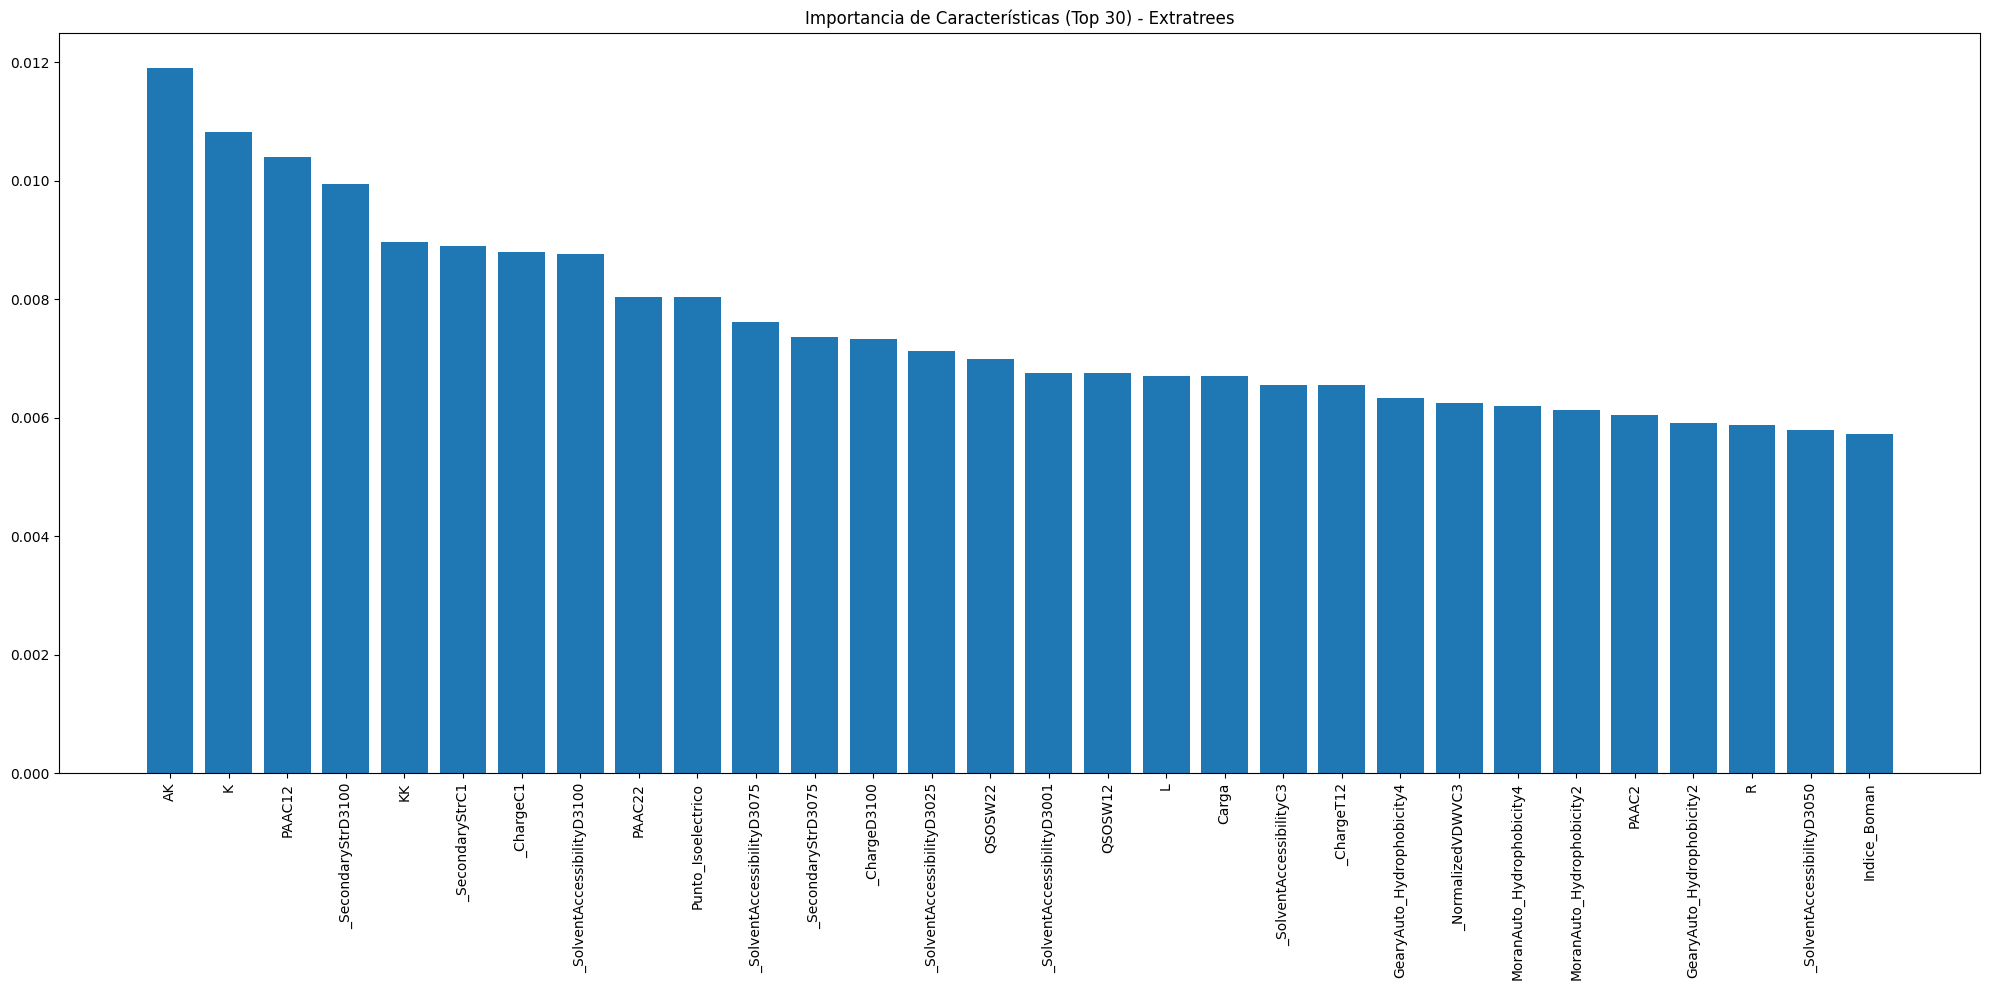

In [ ]:
for model_name, model in models.items():
    if model_name in ['LightGBM', 'XGB', 'Extratrees']:
        # Obtener importancias de características
        if hasattr(model, 'feature_importances_'):
            importances = model.feature_importances_
        elif hasattr(model, 'estimators_'):
            importances = model.estimators_[0].feature_importances_  # Para MultiOutputClassifier
        else:
            continue

        # Ordenar y seleccionar las 30 características más importantes
        indices = np.argsort(importances)[::-1][:30]  # Seleccionar las 30 más importantes
        top_importances = importances[indices]
        top_features = np.array(X_train_temp.columns)[indices]

        # Crear el gráfico
        plt.figure(figsize=(20, 10))
        plt.title(f'Importancia de Características (Top 30) - {model_name}')
        plt.bar(range(30), top_importances, align="center")
        plt.xticks(range(30), top_features, rotation=90)
        plt.tight_layout()
        plt.show()

In [ ]:
# Configurar modelos
models = {
    'LightGBM': MultiOutputClassifier(lgb.LGBMClassifier(n_estimators=1000, learning_rate=0.1), n_jobs=-1),
    'XGB': xgb.XGBClassifier(n_estimators=500, learning_rate=0.1, use_label_encoder=False, eval_metric='mlogloss'),
    'Extratrees': ExtraTreesClassifier(min_samples_leaf=1, min_samples_split=2, n_estimators=300, random_state=42, criterion="entropy")
}

# Parámetros de KFold
n_splits = 5
mskf = MultilabelStratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

# Iterar sobre los splits
for random_state in [42]:  # Si planeas probar con más random_states
    print(f'\nRandom State: {random_state}')

    fold_scores = {}

    for model_name, model in models.items():
        print(f'\nModelo: {model_name}')
        fold_scores[model_name] = []

        for fold, (train_idx, test_idx) in enumerate(mskf.split(X_train_temp, y_antiMCT)):
            print(f'\nFold {fold + 1}/{n_splits}')

            # Dividir los datos
            X_train, X_test = X_train_temp.iloc[train_idx], X_train_temp.iloc[test_idx]
            y_train, y_test = y_antiMCT.iloc[train_idx], y_antiMCT.iloc[test_idx]

            # Entrenar el modelo
            model.fit(X_train, y_train)
            predictions = model.predict(X_test)

            # Calcular métricas
            f1 = f1_score(y_test, predictions, average='micro')
            fold_scores[model_name].append(f1)
            print(f'F1 Score (Fold {fold + 1}): {f1:.2f}')

            # Generar reporte
            report = classification_report(y_test, predictions, target_names=['Anticancerigeno', 'Antitumoral'])
            print(report)

    # Promediar los resultados de los folds para cada modelo
    for model_name in fold_scores:
        avg_f1 = sum(fold_scores[model_name]) / len(fold_scores[model_name])
        print(f'\n{model_name} - F1 Score Promedio: {avg_f1:.2f}')


Random State: 42

Modelo: LightGBM

Fold 1/5
F1 Score (Fold 1): 0.48
                 precision    recall  f1-score   support

Anticancerigeno       0.80      0.33      0.46       283
    Antitumoral       0.75      0.42      0.54        86

      micro avg       0.79      0.35      0.48       369
      macro avg       0.78      0.37      0.50       369
   weighted avg       0.79      0.35      0.48       369
    samples avg       0.01      0.01      0.01       369


Fold 2/5


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in samples with no true nor predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


F1 Score (Fold 2): 0.49
                 precision    recall  f1-score   support

Anticancerigeno       0.79      0.33      0.47       283
    Antitumoral       0.79      0.43      0.55        87

      micro avg       0.79      0.35      0.49       370
      macro avg       0.79      0.38      0.51       370
   weighted avg       0.79      0.35      0.49       370
    samples avg       0.02      0.01      0.01       370


Fold 3/5


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in samples with no true nor predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


F1 Score (Fold 3): 0.52
                 precision    recall  f1-score   support

Anticancerigeno       0.82      0.36      0.50       283
    Antitumoral       0.76      0.45      0.57        87

      micro avg       0.81      0.38      0.52       370
      macro avg       0.79      0.40      0.53       370
   weighted avg       0.81      0.38      0.52       370
    samples avg       0.02      0.02      0.02       370


Fold 4/5


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in samples with no true nor predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


F1 Score (Fold 4): 0.49
                 precision    recall  f1-score   support

Anticancerigeno       0.80      0.35      0.49       282
    Antitumoral       0.76      0.36      0.49        86

      micro avg       0.79      0.35      0.49       368
      macro avg       0.78      0.36      0.49       368
   weighted avg       0.79      0.35      0.49       368
    samples avg       0.02      0.01      0.01       368


Fold 5/5


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in samples with no true nor predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


F1 Score (Fold 5): 0.47
                 precision    recall  f1-score   support

Anticancerigeno       0.84      0.31      0.45       283
    Antitumoral       0.79      0.39      0.52        87

      micro avg       0.82      0.33      0.47       370
      macro avg       0.81      0.35      0.49       370
   weighted avg       0.83      0.33      0.47       370
    samples avg       0.01      0.01      0.01       370


Modelo: XGB


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in samples with no true nor predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



Fold 1/5


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [02:05:58] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


F1 Score (Fold 1): 0.46
                 precision    recall  f1-score   support

Anticancerigeno       0.81      0.31      0.45       283
    Antitumoral       0.77      0.38      0.51        86

      micro avg       0.80      0.33      0.46       369
      macro avg       0.79      0.35      0.48       369
   weighted avg       0.80      0.33      0.46       369
    samples avg       0.01      0.01      0.01       369


Fold 2/5


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in samples with no true nor predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/xgboost/co

F1 Score (Fold 2): 0.48
                 precision    recall  f1-score   support

Anticancerigeno       0.80      0.31      0.45       283
    Antitumoral       0.82      0.41      0.55        87

      micro avg       0.81      0.34      0.48       370
      macro avg       0.81      0.36      0.50       370
   weighted avg       0.81      0.34      0.47       370
    samples avg       0.01      0.01      0.01       370


Fold 3/5


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in samples with no true nor predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/xgboost/co

F1 Score (Fold 3): 0.51
                 precision    recall  f1-score   support

Anticancerigeno       0.86      0.37      0.51       283
    Antitumoral       0.75      0.38      0.50        87

      micro avg       0.83      0.37      0.51       370
      macro avg       0.80      0.37      0.51       370
   weighted avg       0.83      0.37      0.51       370
    samples avg       0.02      0.02      0.02       370


Fold 4/5


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in samples with no true nor predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/xgboost/co

F1 Score (Fold 4): 0.46
                 precision    recall  f1-score   support

Anticancerigeno       0.80      0.32      0.46       282
    Antitumoral       0.87      0.31      0.46        86

      micro avg       0.81      0.32      0.46       368
      macro avg       0.83      0.32      0.46       368
   weighted avg       0.81      0.32      0.46       368
    samples avg       0.01      0.01      0.01       368


Fold 5/5


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in samples with no true nor predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/xgboost/co

F1 Score (Fold 5): 0.44
                 precision    recall  f1-score   support

Anticancerigeno       0.82      0.28      0.42       283
    Antitumoral       0.79      0.36      0.49        87

      micro avg       0.81      0.30      0.44       370
      macro avg       0.81      0.32      0.45       370
   weighted avg       0.82      0.30      0.43       370
    samples avg       0.01      0.01      0.01       370


Modelo: Extratrees


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in samples with no true nor predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



Fold 1/5
F1 Score (Fold 1): 0.43
                 precision    recall  f1-score   support

Anticancerigeno       0.77      0.27      0.40       283
    Antitumoral       0.74      0.40      0.52        86

      micro avg       0.76      0.30      0.43       369
      macro avg       0.75      0.33      0.46       369
   weighted avg       0.76      0.30      0.43       369
    samples avg       0.01      0.01      0.01       369


Fold 2/5


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in samples with no true nor predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


F1 Score (Fold 2): 0.45
                 precision    recall  f1-score   support

Anticancerigeno       0.78      0.31      0.44       283
    Antitumoral       0.80      0.32      0.46        87

      micro avg       0.79      0.31      0.45       370
      macro avg       0.79      0.31      0.45       370
   weighted avg       0.79      0.31      0.45       370
    samples avg       0.01      0.01      0.01       370


Fold 3/5


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in samples with no true nor predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


F1 Score (Fold 3): 0.48
                 precision    recall  f1-score   support

Anticancerigeno       0.83      0.34      0.48       283
    Antitumoral       0.76      0.36      0.48        87

      micro avg       0.81      0.34      0.48       370
      macro avg       0.79      0.35      0.48       370
   weighted avg       0.82      0.34      0.48       370
    samples avg       0.01      0.01      0.01       370


Fold 4/5


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in samples with no true nor predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


F1 Score (Fold 4): 0.43
                 precision    recall  f1-score   support

Anticancerigeno       0.78      0.31      0.44       282
    Antitumoral       0.75      0.28      0.41        86

      micro avg       0.77      0.30      0.43       368
      macro avg       0.76      0.29      0.42       368
   weighted avg       0.77      0.30      0.43       368
    samples avg       0.01      0.01      0.01       368


Fold 5/5


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in samples with no true nor predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


F1 Score (Fold 5): 0.46
                 precision    recall  f1-score   support

Anticancerigeno       0.82      0.29      0.43       283
    Antitumoral       0.88      0.40      0.55        87

      micro avg       0.84      0.32      0.46       370
      macro avg       0.85      0.35      0.49       370
   weighted avg       0.83      0.32      0.46       370
    samples avg       0.01      0.01      0.01       370


LightGBM - F1 Score Promedio: 0.49

XGB - F1 Score Promedio: 0.47

Extratrees - F1 Score Promedio: 0.45


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in samples with no true nor predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
from sklearn.model_selection import ParameterGrid, cross_val_score
import lightgbm as lgb
from sklearn.multioutput import MultiOutputClassifier

# Definir el modelo base LGBMClassifier con parámetros variables
model_base = lgb.LGBMClassifier(random_state=42)

# Parámetros a evaluar
param_grid = {
    'n_estimators': [300, 500, 1000],  # Número de árboles
    'learning_rate': [0.01, 0.1],  # Tasa de aprendizaje
    'max_bin': [255, 300]
}

# Crear el modelo MultiOutputClassifier con LGBMClassifier
multi_output_model = MultiOutputClassifier(model_base, n_jobs=-1)

# Crear una función para ajustar el modelo y devolver el resultado
def evaluate_model(params):
    model_base.set_params(**params)  # Establecer los parámetros solo para el modelo base
    multi_output_model.fit(X_train, y_train)  # Ajustar el MultiOutputClassifier
    scores = cross_val_score(multi_output_model, X_train, y_train, cv=5, scoring='f1_weighted')
    return {'params': params, 'mean_test_score': np.mean(scores)}

# Ejecutar el ajuste con monitoreo
results = []
for i, params in enumerate(ParameterGrid(param_grid)):
    print(f"Evaluando combinación {i + 1}/{len(ParameterGrid(param_grid))}: {params}")
    result = evaluate_model(params)
    results.append(result)

# Convertir a DataFrame para una visualización más clara
results_df = pd.DataFrame(results)

# Mejor resultado
best_result = results_df.loc[results_df['mean_test_score'].idxmax()]
print("\nMejores parámetros:", best_result['params'])
print("Mejor F1 Score:", best_result['mean_test_score'])

##Fase 3

In [ ]:
X_train_temp, y_functionalities

(       Longitud  Indice_Boman     Carga  Punto_Isoelectrico  Hidrofobicidad  \
 0      0.139785      0.203037  0.341587            0.626807        0.681102   
 1      0.182796      0.277942  0.370938            0.723789        0.537257   
 2      0.086022      0.432109  0.356255            0.682366        0.311825   
 3      0.322581      0.227628  0.401222            0.689474        0.618085   
 4      0.032258      0.121394  0.322523            0.308697        0.725313   
 ...         ...           ...       ...                 ...             ...   
 14532  0.956989      0.313810  0.262770            0.192312        0.562486   
 14533  0.053763      0.264485  0.372381            0.750300        0.534587   
 14534  0.021505      0.473225  0.370928            0.900177        0.464462   
 14535  0.258065      0.300647  0.385075            0.672971        0.557977   
 14536  0.075269      0.119672  0.338653            0.626458        0.750759   
 
               R         N         D  

In [ ]:
#Eliminamos las filas con péptidos totalmente negativos
mask = ~((y_functionalities['Antifúngico'] == 0) &
        (y_functionalities['Antiviral'] == 0) &
        (y_functionalities['Antibacteriano'] == 0) &
        (y_functionalities['Anti Gram +'] == 0) &
        (y_functionalities['Anti Gram -'] == 0) &
        (y_functionalities['AntiVIH'] == 0)  &
        (y_functionalities['Antiparasitario'] == 0))

y_functionalities = y_functionalities[mask].reset_index(drop=True)
X_train_temp = X_train_temp[mask].reset_index(drop=True)

In [ ]:
y_val_phase3, X_val

(       Antifúngico  Antiviral  Antibacteriano  Anti Gram +  Anti Gram -  \
 8969           0.0        0.0             0.0          0.0          0.0   
 7745           0.0        1.0             0.0          0.0          0.0   
 879            1.0        1.0             1.0          1.0          1.0   
 34290          0.0        0.0             0.0          0.0          0.0   
 21866          0.0        0.0             0.0          0.0          0.0   
 ...            ...        ...             ...          ...          ...   
 16801          1.0        0.0             1.0          0.0          0.0   
 4844           0.0        0.0             0.0          1.0          1.0   
 32542          0.0        0.0             0.0          0.0          0.0   
 10210          0.0        1.0             0.0          0.0          0.0   
 17593          0.0        0.0             1.0          0.0          0.0   
 
        AntiVIH  Antiparasitario  
 8969       0.0              0.0  
 7745       0.0 

In [ ]:
#Eliminamos las filas con péptidos totalmente negativos
mask = ~((y_val_phase3['Antifúngico'] == 0) &
        (y_val_phase3['Antiviral'] == 0) &
        (y_val_phase3['Antibacteriano'] == 0) &
        (y_val_phase3['Anti Gram +'] == 0) &
        (y_val_phase3['Anti Gram -'] == 0) &
        (y_val_phase3['AntiVIH'] == 0)  &
        (y_val_phase3['Antiparasitario'] == 0))

y_val_phase3 = y_val_phase3[mask].reset_index(drop=True)
X_val = X_val[mask].reset_index(drop=True)

In [ ]:
X_train_temp.shape, y_functionalities.shape

((14537, 245), (14537, 7))

In [ ]:
y_functionalities

,Antifúngico,Antiviral,Antibacteriano,Anti Gram +,Anti Gram -,AntiVIH,Antiparasitario
0,0.0,0.0,1.0,1.0,1.0,0.0,0.0
1,0.0,0.0,1.0,1.0,1.0,0.0,0.0
2,0.0,0.0,0.0,1.0,1.0,0.0,0.0
3,0.0,0.0,1.0,1.0,1.0,0.0,0.0
4,0.0,0.0,0.0,1.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...
14532,1.0,0.0,0.0,0.0,0.0,0.0,0.0
14533,1.0,0.0,0.0,1.0,1.0,0.0,0.0
14534,1.0,0.0,1.0,1.0,1.0,0.0,0.0
14535,1.0,1.0,1.0,1.0,1.0,0.0,0.0


In [ ]:
models = {
    'LightGBM': MultiOutputClassifier(lgb.LGBMClassifier(n_estimators=1000, learning_rate=0.1), n_jobs=-1),
    'XGB': xgb.XGBClassifier(n_estimators = 500, learning_rate=0.1, learuse_label_encoder=False, eval_metric='mlogloss'),
    'Extratrees': ExtraTreesClassifier(min_samples_leaf=1, min_samples_split=2, n_estimators=300, random_state=42)
}

# Aplicar diferentes random_states
for random_state in [42]:
    print(f'\nRandom State: {random_state}')

    X_train, X_test, y_train, y_test = train_test_split(X_train_temp, y_functionalities, test_size=0.2, random_state=42)

    for model_name, model in models.items():
        if hasattr(model, 'random_state'):  # Verificar si el modelo tiene el parámetro random_state
          model.set_params(random_state=42)  # Establecer random_state
        model.fit(X_train, y_train)
        predictions = model.predict(X_test)
        f1 = f1_score(y_test, predictions, average='micro')
        print(f'{model_name} - F1 Score: {f1:.2f}')
        report = classification_report(y_test, predictions, target_names=['Antifúngico',	'Antiviral',	'Antibacteriano',	'Anti Gram +',	'Anti Gram -',	'AntiVIH',	'Antiparasitario'])  # Añade los nombres de tus clases
        print(report)
        predictions_val = model.predict(X_val)
        f1_val = f1_score(y_val_phase3, predictions_val, average='micro')
        print("F1 en conjunto de validación:", classification_report(y_val_phase3, predictions_val, target_names=['Antifúngico', 'Antiviral', 'Antibacteriano', 'Anti Gram +', 'Anti Gram -', 'AntiVIH', 'Antiparasitario']))


Random State: 42
LightGBM - F1 Score: 0.79
                 precision    recall  f1-score   support

    Antifúngico       0.77      0.62      0.69       970
      Antiviral       0.78      0.61      0.69       641
 Antibacteriano       0.85      0.81      0.83      1326
    Anti Gram +       0.83      0.85      0.84      1460
    Anti Gram -       0.84      0.84      0.84      1458
        AntiVIH       0.83      0.40      0.54       139
Antiparasitario       0.62      0.13      0.21        63

      micro avg       0.82      0.76      0.79      6057
      macro avg       0.79      0.61      0.66      6057
   weighted avg       0.82      0.76      0.78      6057
    samples avg       0.81      0.79      0.77      6057



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


F1 en conjunto de validación:                  precision    recall  f1-score   support

    Antifúngico       0.77      0.62      0.69      1199
      Antiviral       0.80      0.64      0.71       847
 Antibacteriano       0.84      0.82      0.83      1649
    Anti Gram +       0.82      0.84      0.83      1729
    Anti Gram -       0.83      0.83      0.83      1695
        AntiVIH       0.81      0.48      0.61       180
Antiparasitario       0.56      0.16      0.25        88

      micro avg       0.81      0.76      0.78      7387
      macro avg       0.77      0.63      0.68      7387
   weighted avg       0.81      0.76      0.78      7387
    samples avg       0.81      0.80      0.77      7387



/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [01:54:50] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "learuse_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGB - F1 Score: 0.79
                 precision    recall  f1-score   support

    Antifúngico       0.76      0.63      0.69       970
      Antiviral       0.78      0.63      0.70       641
 Antibacteriano       0.85      0.81      0.83      1326
    Anti Gram +       0.84      0.85      0.85      1460
    Anti Gram -       0.84      0.84      0.84      1458
        AntiVIH       0.85      0.41      0.55       139
Antiparasitario       0.67      0.10      0.17        63

      micro avg       0.83      0.76      0.79      6057
      macro avg       0.80      0.61      0.66      6057
   weighted avg       0.82      0.76      0.79      6057
    samples avg       0.82      0.80      0.78      6057



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


F1 en conjunto de validación:                  precision    recall  f1-score   support

    Antifúngico       0.77      0.62      0.69      1199
      Antiviral       0.78      0.64      0.70       847
 Antibacteriano       0.84      0.81      0.83      1649
    Anti Gram +       0.82      0.84      0.83      1729
    Anti Gram -       0.82      0.83      0.82      1695
        AntiVIH       0.83      0.49      0.62       180
Antiparasitario       0.67      0.16      0.26        88

      micro avg       0.81      0.76      0.78      7387
      macro avg       0.79      0.63      0.68      7387
   weighted avg       0.81      0.76      0.78      7387
    samples avg       0.80      0.79      0.77      7387

Extratrees - F1 Score: 0.78
                 precision    recall  f1-score   support

    Antifúngico       0.78      0.58      0.67       970
      Antiviral       0.79      0.58      0.67       641
 Antibacteriano       0.85      0.79      0.82      1326
    Anti Gram +       0.84

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


F1 en conjunto de validación:                  precision    recall  f1-score   support

    Antifúngico       0.79      0.57      0.66      1199
      Antiviral       0.79      0.60      0.68       847
 Antibacteriano       0.85      0.81      0.83      1649
    Anti Gram +       0.81      0.84      0.83      1729
    Anti Gram -       0.81      0.82      0.82      1695
        AntiVIH       0.82      0.38      0.52       180
Antiparasitario       0.61      0.16      0.25        88

      micro avg       0.82      0.74      0.78      7387
      macro avg       0.78      0.60      0.66      7387
   weighted avg       0.81      0.74      0.77      7387
    samples avg       0.80      0.78      0.76      7387



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
models = {
    'LightGBM': MultiOutputClassifier(lgb.LGBMClassifier(n_estimators=1000, learning_rate=0.1), n_jobs=-1),
    'XGB': xgb.XGBClassifier(n_estimators=500, learning_rate=0.1, use_label_encoder=False, eval_metric='mlogloss'),
    'Extratrees': ExtraTreesClassifier(min_samples_leaf=1, min_samples_split=2, n_estimators=300, random_state=42)
}

# Parámetros de KFold
n_splits = 5
mskf = MultilabelStratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

for random_state in [42]:
    print(f'\nRandom State: {random_state}')

    fold_scores = {}

    for model_name, model in models.items():
        print(f'\nModelo: {model_name}')
        fold_scores[model_name] = []

        for fold, (train_idx, test_idx) in enumerate(mskf.split(X_train_temp, y_functionalities)):
            print(f'\nFold {fold + 1}/{n_splits}')

            # Dividir los datos
            X_train, X_test = X_train_temp.iloc[train_idx], X_train_temp.iloc[test_idx]
            y_train, y_test = y_functionalities.iloc[train_idx], y_functionalities.iloc[test_idx]

            # Entrenar el modelo
            model.fit(X_train, y_train)
            predictions = model.predict(X_test)

            # Calcular métricas
            f1 = f1_score(y_test, predictions, average='micro')
            fold_scores[model_name].append(f1)
            print(f'F1 Score (Fold {fold + 1}): {f1:.2f}')

            # Generar reporte
            report = classification_report(
                y_test, predictions,
                target_names=['Antifúngico', 'Antiviral', 'Antibacteriano',
                              'Anti Gram +', 'Anti Gram -', 'AntiVIH', 'Antiparasitario']
            )
            print(report)

    # Promediar los resultados de los folds para cada modelo
    for model_name in fold_scores:
        avg_f1 = sum(fold_scores[model_name]) / len(fold_scores[model_name])
        print(f'\n{model_name} - F1 Score Promedio: {avg_f1:.2f}')



Random State: 42

Modelo: LightGBM

Fold 1/5
F1 Score (Fold 1): 0.79
                 precision    recall  f1-score   support

    Antifúngico       0.75      0.59      0.66       957
      Antiviral       0.79      0.66      0.72       681
 Antibacteriano       0.86      0.79      0.82      1322
    Anti Gram +       0.83      0.84      0.84      1411
    Anti Gram -       0.85      0.85      0.85      1403
        AntiVIH       0.87      0.43      0.57       154
Antiparasitario       0.53      0.12      0.19        68

      micro avg       0.83      0.75      0.79      5996
      macro avg       0.79      0.61      0.67      5996
   weighted avg       0.82      0.75      0.78      5996
    samples avg       0.82      0.79      0.78      5996


Fold 2/5


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


F1 Score (Fold 2): 0.78
                 precision    recall  f1-score   support

    Antifúngico       0.75      0.62      0.68       957
      Antiviral       0.81      0.63      0.71       681
 Antibacteriano       0.83      0.79      0.81      1322
    Anti Gram +       0.82      0.85      0.83      1412
    Anti Gram -       0.82      0.84      0.83      1403
        AntiVIH       0.83      0.43      0.57       155
Antiparasitario       0.58      0.10      0.18        67

      micro avg       0.81      0.75      0.78      5997
      macro avg       0.78      0.61      0.66      5997
   weighted avg       0.81      0.75      0.77      5997
    samples avg       0.80      0.78      0.76      5997


Fold 3/5


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


F1 Score (Fold 3): 0.78
                 precision    recall  f1-score   support

    Antifúngico       0.75      0.64      0.69       957
      Antiviral       0.81      0.64      0.72       681
 Antibacteriano       0.84      0.79      0.81      1322
    Anti Gram +       0.80      0.85      0.82      1411
    Anti Gram -       0.80      0.83      0.82      1402
        AntiVIH       0.80      0.48      0.60       155
Antiparasitario       0.35      0.10      0.16        67

      micro avg       0.80      0.76      0.78      5995
      macro avg       0.74      0.62      0.66      5995
   weighted avg       0.80      0.76      0.77      5995
    samples avg       0.80      0.79      0.77      5995


Fold 4/5


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


F1 Score (Fold 4): 0.78
                 precision    recall  f1-score   support

    Antifúngico       0.78      0.61      0.68       958
      Antiviral       0.83      0.62      0.71       681
 Antibacteriano       0.84      0.79      0.82      1323
    Anti Gram +       0.82      0.86      0.84      1412
    Anti Gram -       0.81      0.84      0.83      1403
        AntiVIH       0.88      0.41      0.56       154
Antiparasitario       0.43      0.09      0.15        68

      micro avg       0.82      0.75      0.78      5999
      macro avg       0.77      0.60      0.65      5999
   weighted avg       0.81      0.75      0.78      5999
    samples avg       0.81      0.79      0.77      5999


Fold 5/5


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


F1 Score (Fold 5): 0.79
                 precision    recall  f1-score   support

    Antifúngico       0.77      0.63      0.69       958
      Antiviral       0.81      0.62      0.71       681
 Antibacteriano       0.84      0.79      0.81      1323
    Anti Gram +       0.83      0.86      0.84      1411
    Anti Gram -       0.83      0.86      0.84      1402
        AntiVIH       0.86      0.43      0.57       155
Antiparasitario       0.56      0.13      0.22        67

      micro avg       0.82      0.76      0.79      5997
      macro avg       0.78      0.62      0.67      5997
   weighted avg       0.82      0.76      0.78      5997
    samples avg       0.81      0.80      0.78      5997


Modelo: XGB


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



Fold 1/5


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [02:23:41] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


F1 Score (Fold 1): 0.79
                 precision    recall  f1-score   support

    Antifúngico       0.76      0.61      0.67       957
      Antiviral       0.80      0.67      0.73       681
 Antibacteriano       0.86      0.79      0.82      1322
    Anti Gram +       0.84      0.84      0.84      1411
    Anti Gram -       0.85      0.85      0.85      1403
        AntiVIH       0.81      0.42      0.56       154
Antiparasitario       0.56      0.07      0.13        68

      micro avg       0.83      0.75      0.79      5996
      macro avg       0.78      0.61      0.66      5996
   weighted avg       0.82      0.75      0.78      5996
    samples avg       0.82      0.79      0.78      5996


Fold 2/5


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [02:27:43] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


F1 Score (Fold 2): 0.78
                 precision    recall  f1-score   support

    Antifúngico       0.74      0.63      0.68       957
      Antiviral       0.81      0.62      0.70       681
 Antibacteriano       0.83      0.79      0.81      1322
    Anti Gram +       0.82      0.86      0.84      1412
    Anti Gram -       0.82      0.84      0.83      1403
        AntiVIH       0.82      0.41      0.54       155
Antiparasitario       0.43      0.09      0.15        67

      micro avg       0.81      0.76      0.78      5997
      macro avg       0.75      0.61      0.65      5997
   weighted avg       0.80      0.76      0.77      5997
    samples avg       0.80      0.79      0.76      5997


Fold 3/5


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [02:31:29] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


F1 Score (Fold 3): 0.78
                 precision    recall  f1-score   support

    Antifúngico       0.76      0.64      0.69       957
      Antiviral       0.78      0.64      0.71       681
 Antibacteriano       0.84      0.80      0.82      1322
    Anti Gram +       0.81      0.84      0.83      1411
    Anti Gram -       0.82      0.83      0.82      1402
        AntiVIH       0.80      0.48      0.60       155
Antiparasitario       0.38      0.12      0.18        67

      micro avg       0.81      0.76      0.78      5995
      macro avg       0.74      0.62      0.66      5995
   weighted avg       0.80      0.76      0.78      5995
    samples avg       0.81      0.79      0.77      5995


Fold 4/5


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [02:35:09] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


F1 Score (Fold 4): 0.78
                 precision    recall  f1-score   support

    Antifúngico       0.77      0.61      0.68       958
      Antiviral       0.82      0.62      0.70       681
 Antibacteriano       0.84      0.79      0.82      1323
    Anti Gram +       0.81      0.85      0.83      1412
    Anti Gram -       0.81      0.84      0.83      1403
        AntiVIH       0.89      0.41      0.56       154
Antiparasitario       0.57      0.06      0.11        68

      micro avg       0.81      0.75      0.78      5999
      macro avg       0.79      0.60      0.65      5999
   weighted avg       0.81      0.75      0.77      5999
    samples avg       0.80      0.79      0.77      5999


Fold 5/5


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [02:38:51] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


F1 Score (Fold 5): 0.79
                 precision    recall  f1-score   support

    Antifúngico       0.77      0.64      0.70       958
      Antiviral       0.81      0.64      0.71       681
 Antibacteriano       0.83      0.79      0.81      1323
    Anti Gram +       0.83      0.85      0.84      1411
    Anti Gram -       0.83      0.85      0.84      1402
        AntiVIH       0.87      0.44      0.58       155
Antiparasitario       0.64      0.13      0.22        67

      micro avg       0.82      0.76      0.79      5997
      macro avg       0.80      0.62      0.67      5997
   weighted avg       0.82      0.76      0.78      5997
    samples avg       0.81      0.80      0.78      5997


Modelo: Extratrees


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



Fold 1/5
F1 Score (Fold 1): 0.78
                 precision    recall  f1-score   support

    Antifúngico       0.77      0.58      0.66       957
      Antiviral       0.80      0.62      0.70       681
 Antibacteriano       0.86      0.76      0.81      1322
    Anti Gram +       0.83      0.85      0.84      1411
    Anti Gram -       0.84      0.85      0.84      1403
        AntiVIH       0.85      0.36      0.51       154
Antiparasitario       0.33      0.06      0.10        68

      micro avg       0.83      0.74      0.78      5996
      macro avg       0.75      0.58      0.64      5996
   weighted avg       0.82      0.74      0.77      5996
    samples avg       0.81      0.77      0.76      5996


Fold 2/5


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


F1 Score (Fold 2): 0.77
                 precision    recall  f1-score   support

    Antifúngico       0.77      0.59      0.67       957
      Antiviral       0.83      0.60      0.69       681
 Antibacteriano       0.83      0.77      0.80      1322
    Anti Gram +       0.82      0.85      0.83      1412
    Anti Gram -       0.82      0.84      0.83      1403
        AntiVIH       0.93      0.32      0.48       155
Antiparasitario       0.50      0.09      0.15        67

      micro avg       0.82      0.74      0.77      5997
      macro avg       0.79      0.58      0.64      5997
   weighted avg       0.81      0.74      0.77      5997
    samples avg       0.80      0.77      0.75      5997


Fold 3/5


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


F1 Score (Fold 3): 0.77
                 precision    recall  f1-score   support

    Antifúngico       0.79      0.61      0.69       957
      Antiviral       0.81      0.58      0.68       681
 Antibacteriano       0.84      0.79      0.81      1322
    Anti Gram +       0.80      0.84      0.82      1411
    Anti Gram -       0.81      0.83      0.82      1402
        AntiVIH       0.78      0.35      0.48       155
Antiparasitario       0.32      0.09      0.14        67

      micro avg       0.81      0.74      0.77      5995
      macro avg       0.74      0.59      0.64      5995
   weighted avg       0.80      0.74      0.77      5995
    samples avg       0.79      0.77      0.76      5995


Fold 4/5


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


F1 Score (Fold 4): 0.77
                 precision    recall  f1-score   support

    Antifúngico       0.79      0.56      0.65       958
      Antiviral       0.84      0.56      0.67       681
 Antibacteriano       0.85      0.78      0.81      1323
    Anti Gram +       0.81      0.84      0.83      1412
    Anti Gram -       0.80      0.83      0.82      1403
        AntiVIH       0.93      0.34      0.50       154
Antiparasitario       0.56      0.07      0.13        68

      micro avg       0.82      0.73      0.77      5999
      macro avg       0.80      0.57      0.63      5999
   weighted avg       0.82      0.73      0.76      5999
    samples avg       0.79      0.76      0.75      5999


Fold 5/5


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


F1 Score (Fold 5): 0.78
                 precision    recall  f1-score   support

    Antifúngico       0.79      0.59      0.67       958
      Antiviral       0.80      0.59      0.68       681
 Antibacteriano       0.84      0.79      0.81      1323
    Anti Gram +       0.83      0.85      0.84      1411
    Anti Gram -       0.82      0.84      0.83      1402
        AntiVIH       0.87      0.34      0.49       155
Antiparasitario       0.60      0.13      0.22        67

      micro avg       0.82      0.74      0.78      5997
      macro avg       0.79      0.59      0.65      5997
   weighted avg       0.82      0.74      0.77      5997
    samples avg       0.80      0.78      0.77      5997


LightGBM - F1 Score Promedio: 0.78

XGB - F1 Score Promedio: 0.78

Extratrees - F1 Score Promedio: 0.78


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
